In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path = os.path.join(dirname,filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/liver-disorders/Indian Liver Patient Dataset (ILPD).csv


In [2]:
train_df = pd.read_csv(
    filepath_or_buffer=path
)

In [3]:
train_df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
train_df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
train_df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [7]:
train_df = train_df.dropna()

# Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
wn.filterwarnings(
    action='ignore'
)

In [9]:
train_df['Selector'].value_counts()

Selector
1    414
2    165
Name: count, dtype: int64

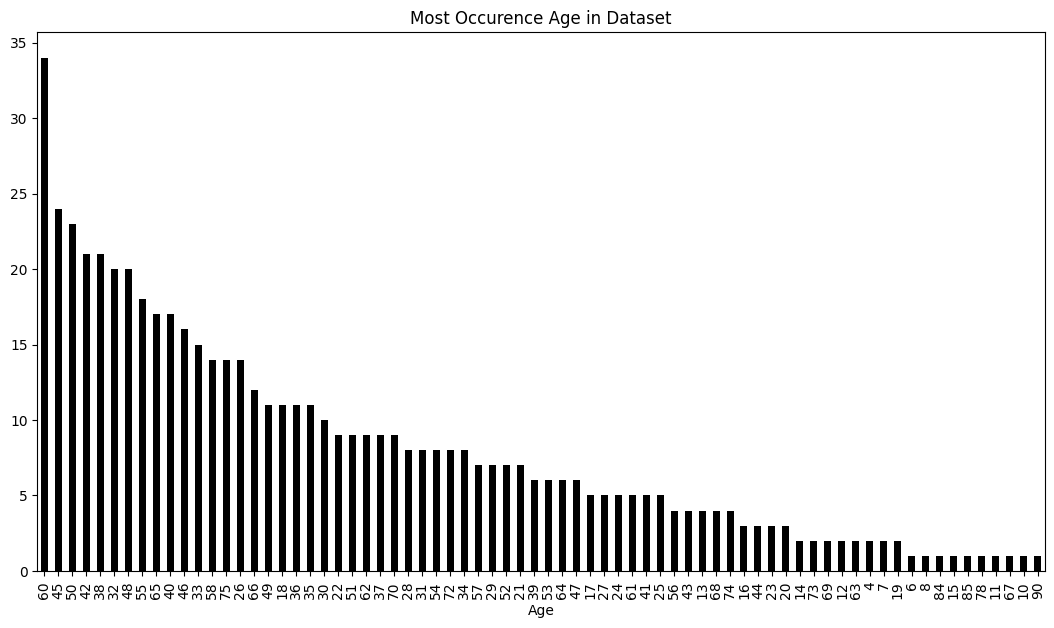

In [10]:
plt.figure(
    figsize=(13,7)
)
plt.title("Most Occurence Age in Dataset")
train_df['Age'].value_counts().plot(
    kind='bar',color='black'
)
plt.xticks(rotation=90)
plt.show();

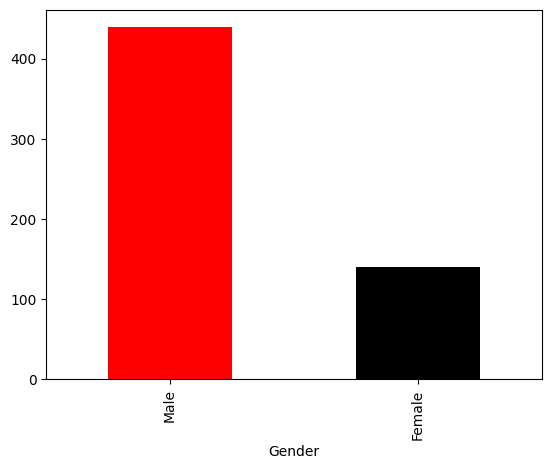

In [11]:
train_df['Gender'].value_counts().plot(
    kind='bar',
    color=['red','black']
)
plt.show()

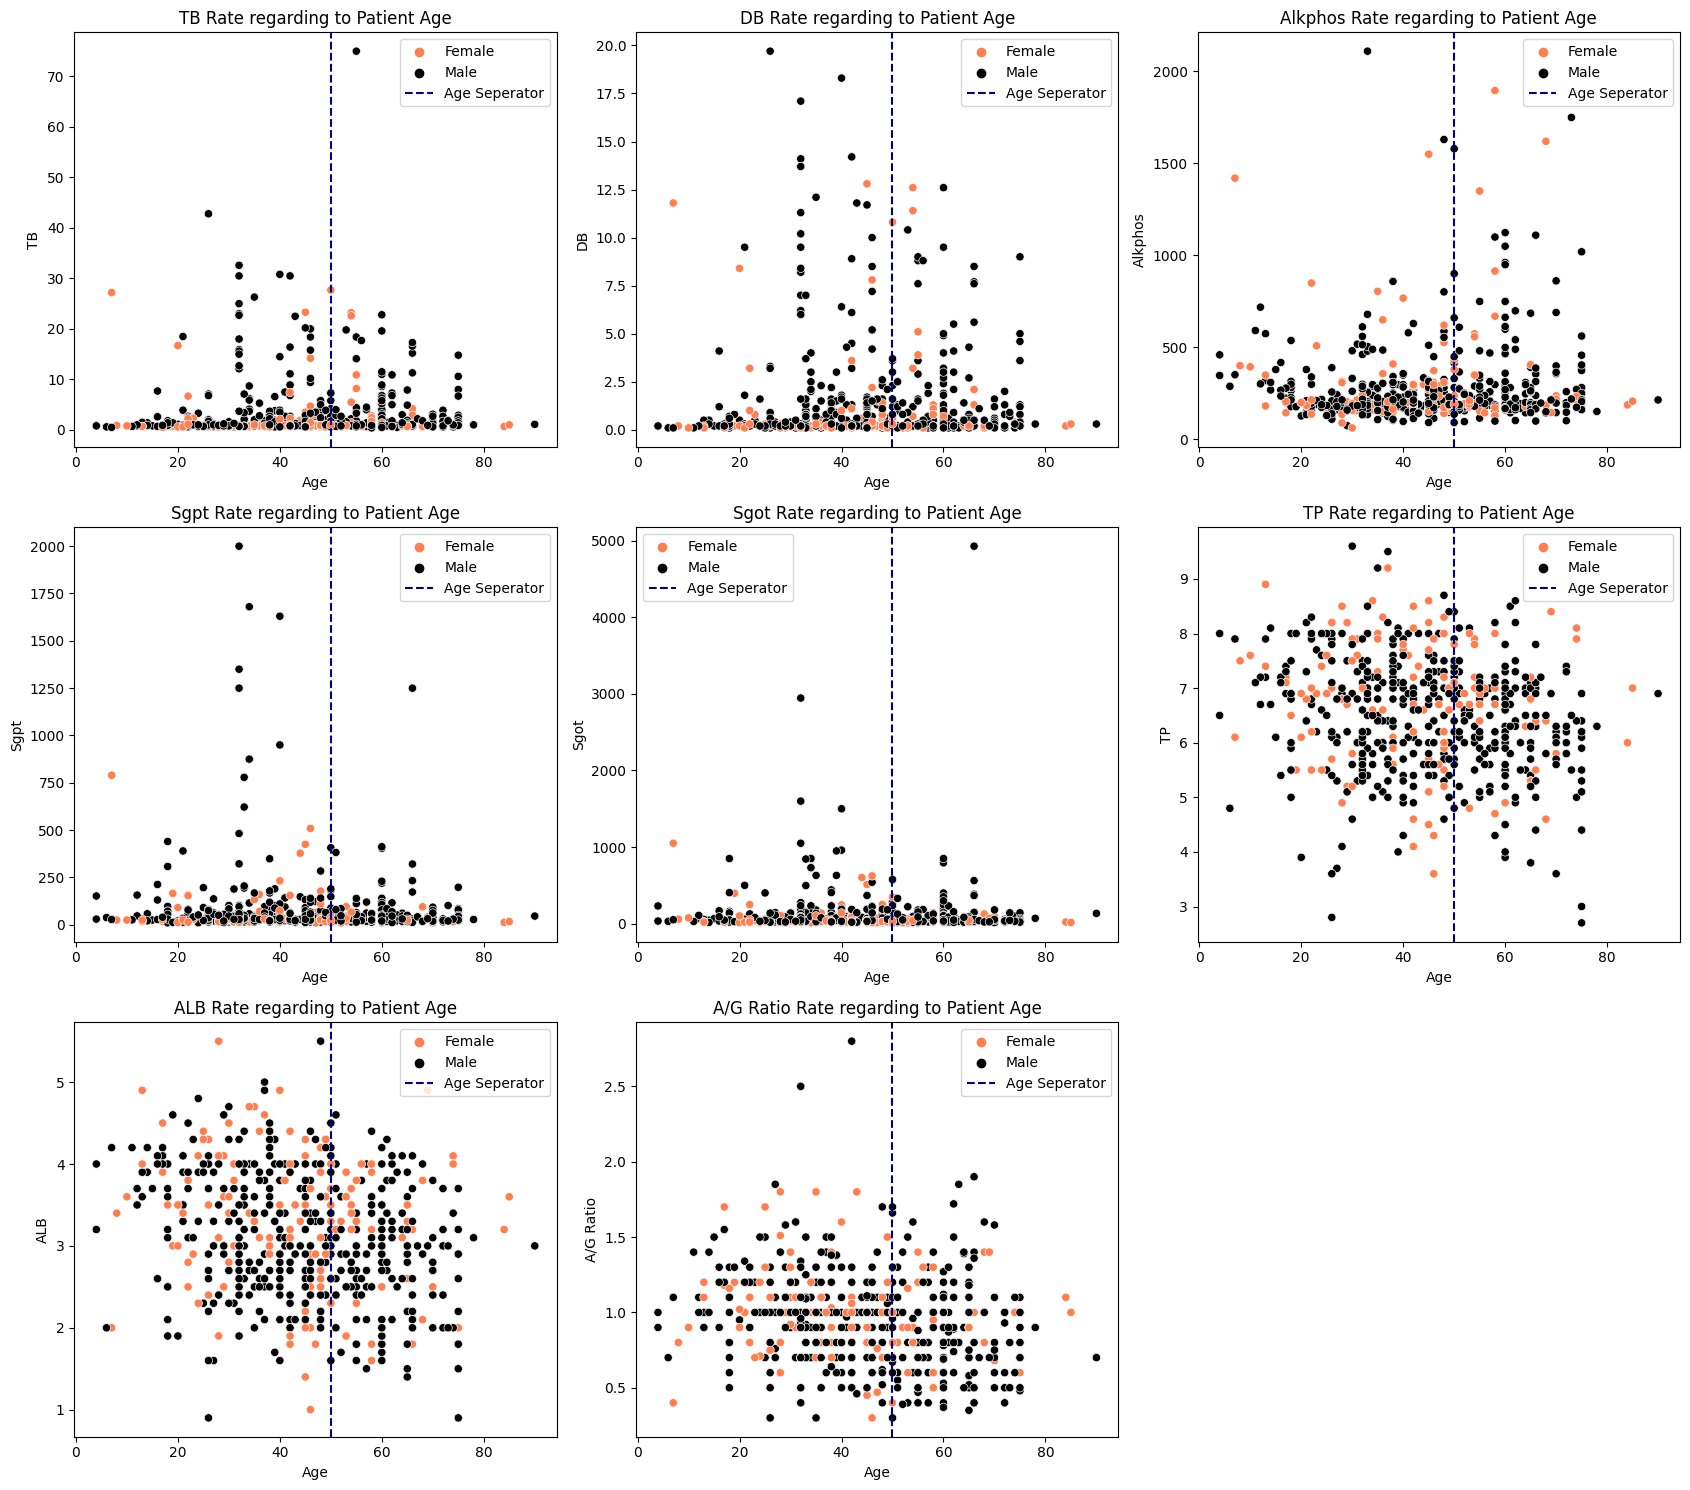

In [12]:
# Age Scatters

cols = ["TB","DB","Alkphos","Sgpt","Sgot","TP", "ALB", "A/G Ratio"]

plt.figure(
    figsize=(17,15)
)

for i,cols in enumerate(cols):
    plt.subplot(3,3,(i+1))
    plt.title(f'{cols} Rate regarding to Patient Age')
    sns.scatterplot(
    data = train_df,
    x = 'Age',
    y = cols,
    hue='Gender',
    palette=['coral','black']
    )
    
    plt.axvline(
        x=50,
        linestyle='--',
        color='darkblue',
        label='Age Seperator'
    )

    plt.legend()  
    
plt.tight_layout()
plt.show()

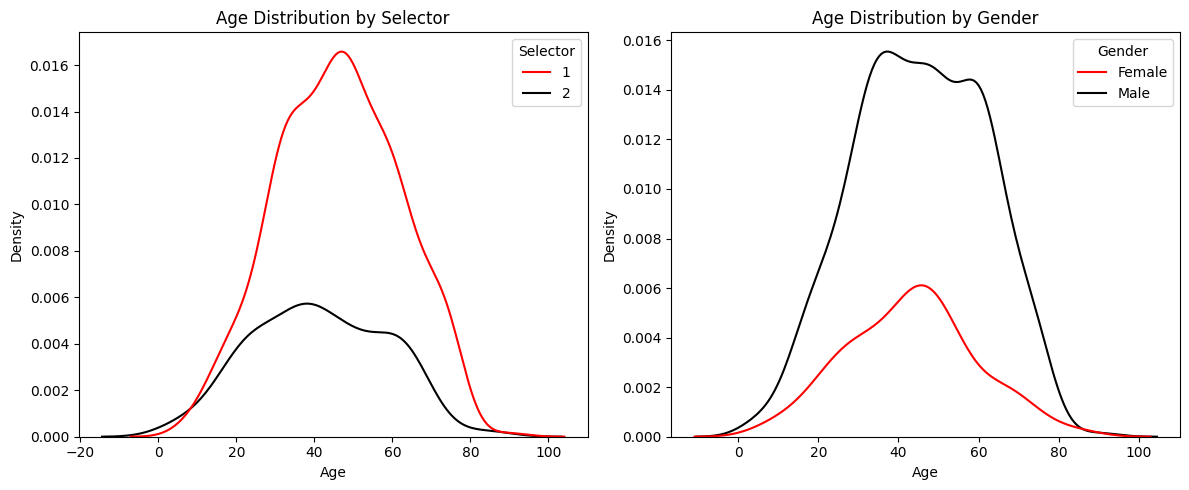

In [13]:
# Age distribution

col = ['Selector','Gender']

plt.figure(
    figsize=(12,5)
)

for i,cols in enumerate(col):
    plt.subplot(1,2,(i+1))
    plt.title(f'Age Distribution by {cols}')
    sns.kdeplot(
    data = train_df,
    x = 'Age',
    hue=cols,
    palette=['Red','black']
    )
    
plt.tight_layout()
plt.show()

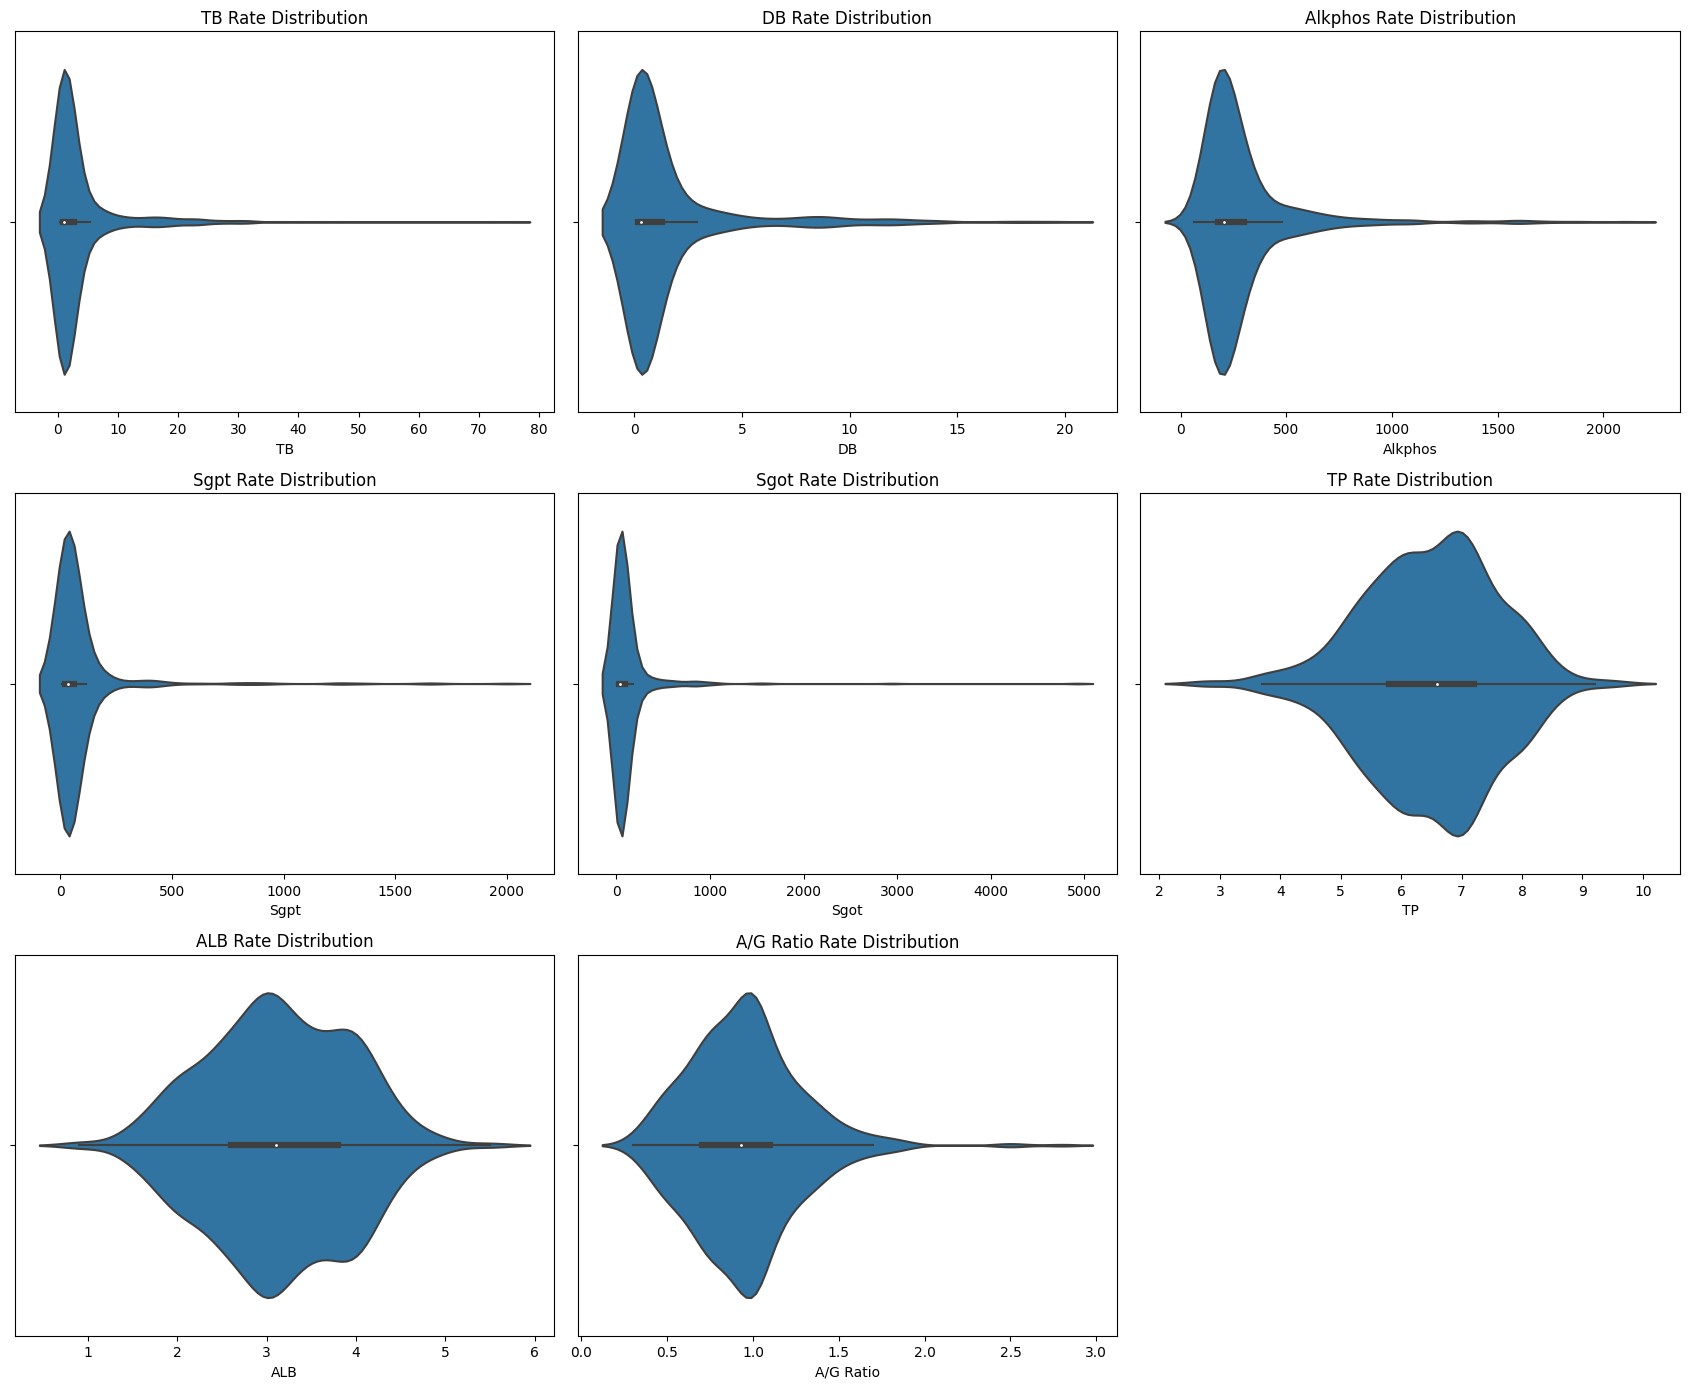

In [14]:
# now check every feature distribuion

cols = ["TB","DB","Alkphos","Sgpt","Sgot","TP", "ALB", "A/G Ratio"]


plt.figure(
    figsize=(17,14)
)

for i,cols in enumerate(cols):
    plt.subplot(3,3,(i+1))
    plt.title(f"{cols} Rate Distribution")
    sns.violinplot(
    data = train_df,
    x = cols,
#     hue='Selector',
    )
    
plt.tight_layout()
plt.show()

# Feature Engineering

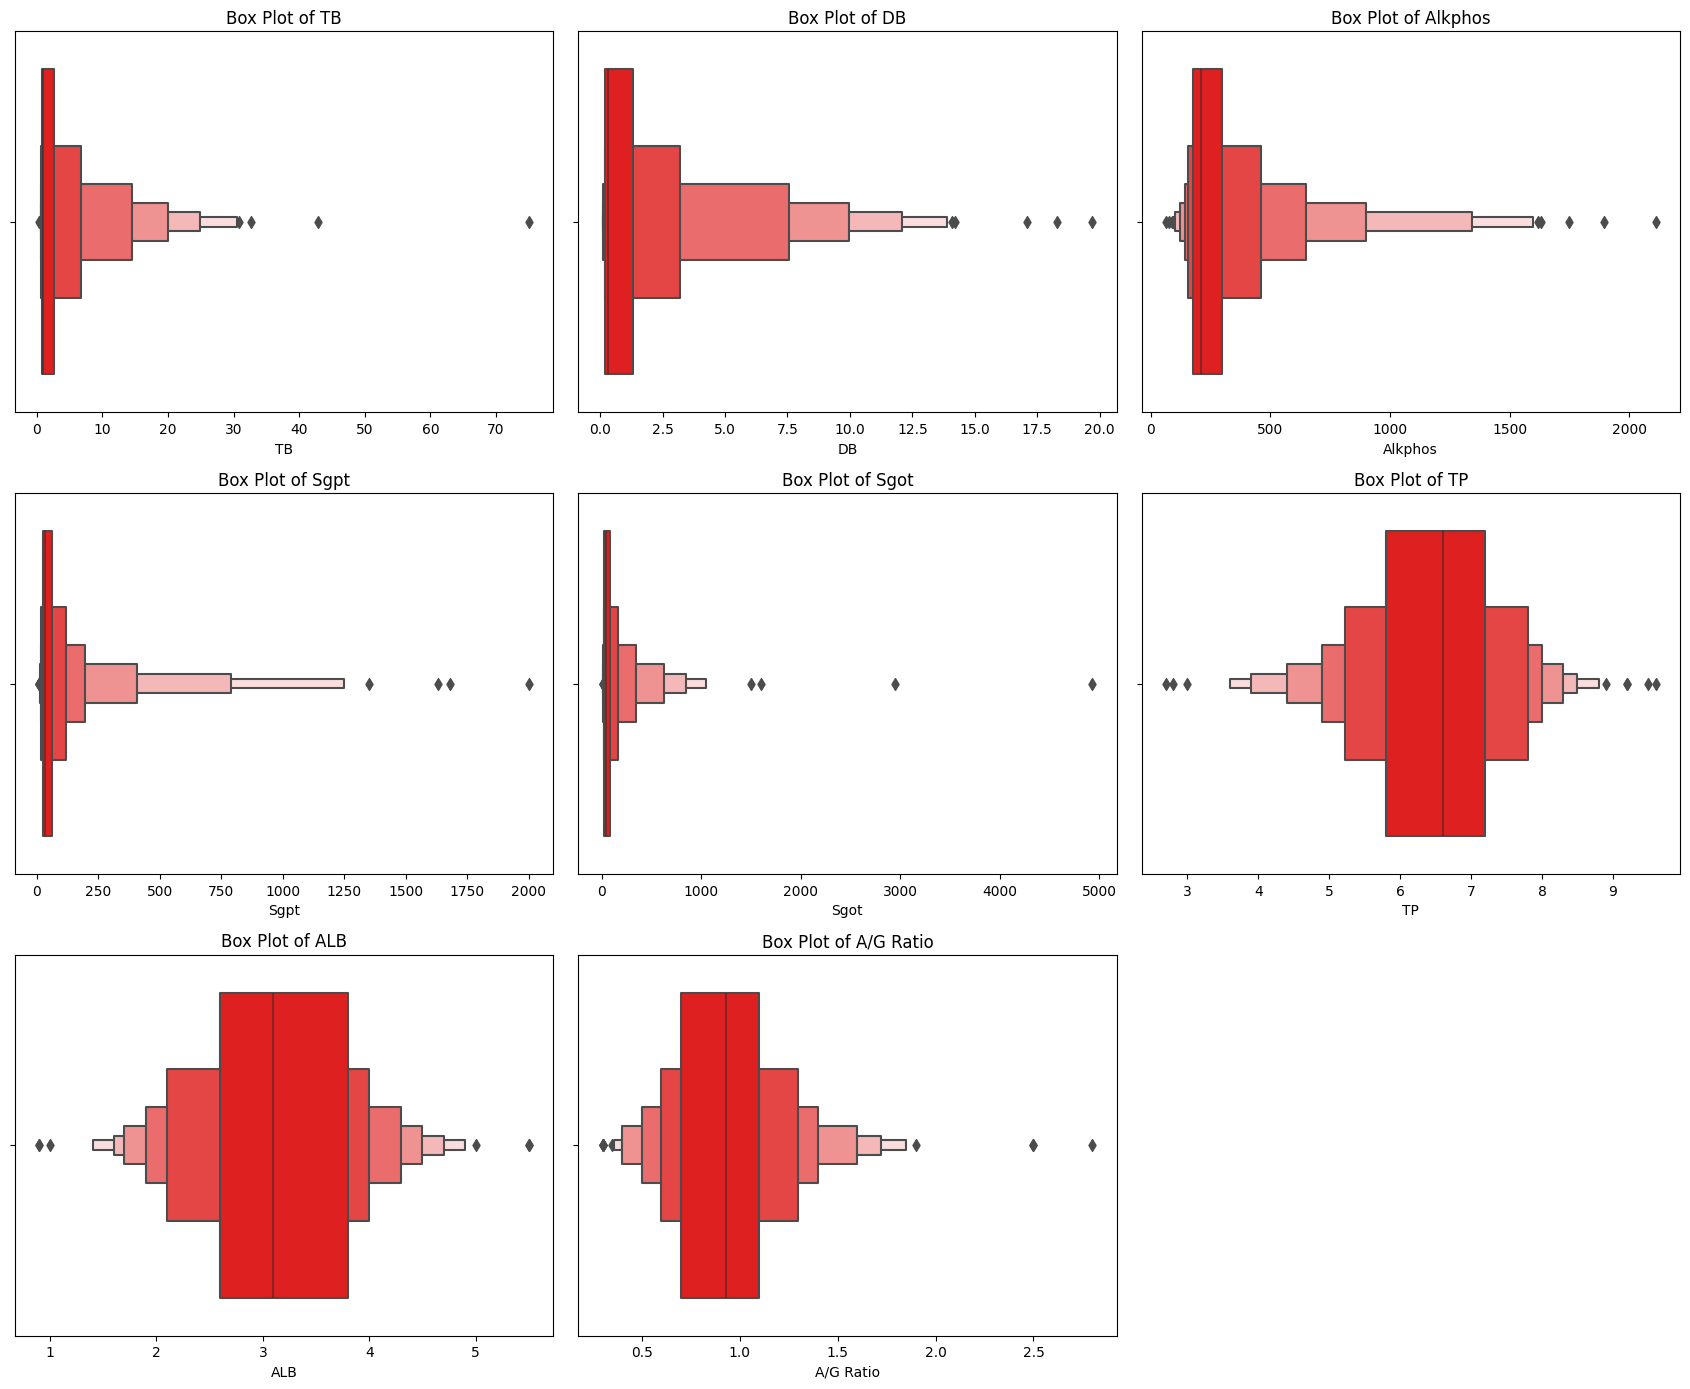

In [15]:
# check the Outliers in dataset
# now check every feature distribuion

cols = ["TB","DB","Alkphos","Sgpt","Sgot","TP", "ALB", "A/G Ratio"]


plt.figure(
    figsize=(17,14)
)

for i,cols in enumerate(cols):
    plt.subplot(3,3,(i+1))
    plt.title(f"Box Plot of {cols}")
    sns.boxenplot(
    data = train_df,
    x = cols,
    color='red'
#     hue='Selector',
#     palette=['navy','darkgreen']
    )
    
plt.tight_layout()
plt.show()


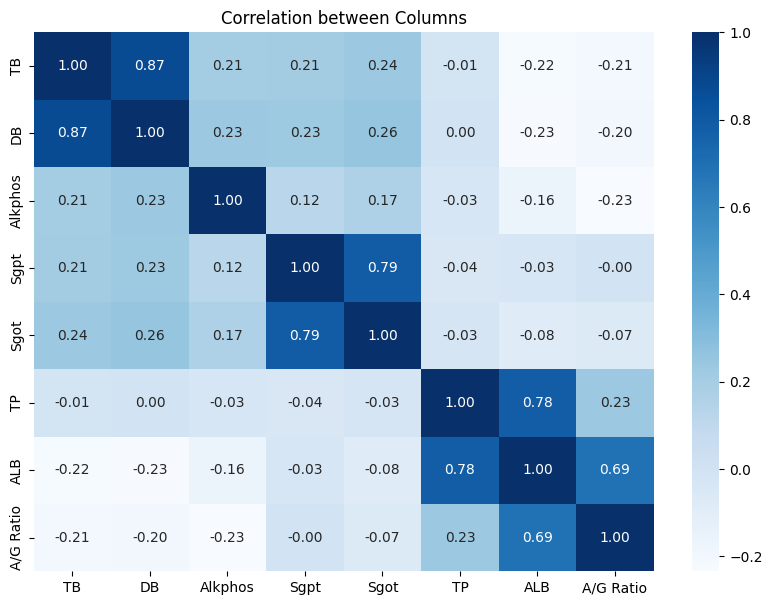

In [16]:
# check the correlation between features

cols = ["TB","DB","Alkphos","Sgpt","Sgot","TP", "ALB", "A/G Ratio"]

plt.figure(
    figsize=(10,7)
)

plt.title("Correlation between Columns")

sns.heatmap(
    data = train_df[cols].corr(),
    annot=True,
    cmap='Blues',
    fmt='.2f'
)
plt.show()

# Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [18]:
train_df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [19]:
# onehotencodings

train_df = pd.get_dummies(
    data=train_df,
    columns=['Gender'],
    dtype=int
)

In [20]:
train_df.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [21]:
x = train_df.drop(
    'Selector',
    axis=1
)
y = train_df['Selector']

# Data Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [23]:
mms = MinMaxScaler(
    feature_range=(0,1)
)

x = mms.fit_transform(x)

In [24]:
ss = StandardScaler()

s_x = ss.fit_transform(x)

In [25]:
s_x[0:4]

array([[ 1.24740264, -0.42031984, -0.49541415, -0.42887006, -0.35583241,
        -0.31911128,  0.29372174,  0.20344649, -0.14738974,  1.77079482,
        -1.77079482],
       [ 1.06230624,  1.21893587,  1.42351783,  1.67508295, -0.09357256,
        -0.03596174,  0.93965456,  0.07746198, -0.64846078, -0.56471817,
         0.56471817],
       [ 1.06230624,  0.64037503,  0.92601694,  0.81624275, -0.11542755,
        -0.14645913,  0.47827397,  0.20344649, -0.17870668, -0.56471817,
         0.56471817],
       [ 0.81551105, -0.37210644, -0.38880682, -0.44941648, -0.3667599 ,
        -0.3122052 ,  0.29372174,  0.329431  ,  0.16577966, -0.56471817,
         0.56471817]])

# Predictive Modeling

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
!pip3 install lazypredict

In [29]:
from lazypredict.Supervised import LazyClassifier

In [30]:
x_train.shape,x_test.shape

((463, 11), (116, 11))

In [31]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 20.23it/s]

[LightGBM] [Info] Number of positive: 131, number of negative: 332
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 463, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.282937 -> initscore=-0.929938
[LightGBM] [Info] Start training from score -0.929938
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [32]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.66,0.69,0.69,0.67,0.02
GaussianNB,0.56,0.68,0.68,0.56,0.01
QuadraticDiscriminantAnalysis,0.57,0.68,0.68,0.57,0.01
BernoulliNB,0.67,0.66,0.66,0.68,0.01
LGBMClassifier,0.75,0.65,0.65,0.73,0.09
LogisticRegression,0.76,0.61,0.61,0.72,0.02
RandomForestClassifier,0.74,0.60,0.60,0.70,0.20
AdaBoostClassifier,0.71,0.59,0.59,0.69,0.11
ExtraTreeClassifier,0.68,0.59,0.59,0.67,0.01
